# Capítulo 14

## Análise Estatística e aplicações...
### Statsmodels Python

### Trabalhando com problemas de negócio...
##### Existe alguma relação entre a área de imóveis e o valor do aluguel em uma determinada cidade? Caso exista, como podemos mensurá-la?

In [1]:
# buscando dados históricos para análise (imprescindível)
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# carregando o dataset
df_dsa=pd.read_csv('dataset.csv')
df_dsa

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222
...,...,...,...,...,...,...,...
2995,560.20514,68,1981,2,0,0,731
2996,454.00000,56,1970,1,0,0,1712
2997,218.56410,76,1939,1,0,0,1014
2998,739.84610,49,1994,2,1,1,1853


In [4]:
df_dsa.shape

(3000, 7)

In [5]:
df_dsa.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [6]:
df_dsa.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [7]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


### Análise exploratória

In [8]:
# verifica valores ausentes
df_dsa.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [9]:
# resumo estatístico
df_dsa.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [10]:
# resumo estatístico da variável alvo
df_dsa['valor_aluguel'].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

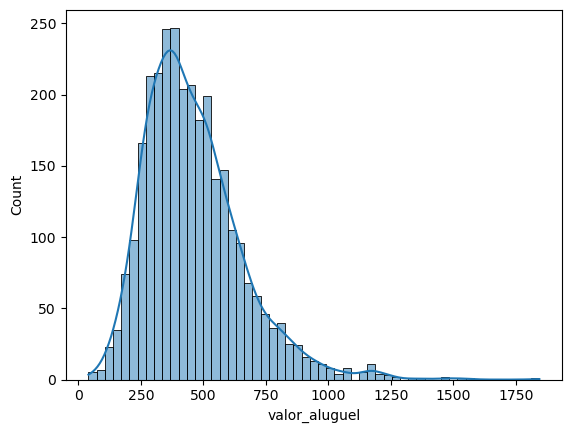

In [11]:
# histograma da variável alvo
sns.histplot(data=df_dsa, x='valor_aluguel', kde=True)

In [ ]:
# correlação da variável alvo (coeficiente de correlação de Pearson)
df_dsa.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


#### Coeficiente de correlação
O coeficiente de correlação é uma medida estatística que indica a força e a direção da relação linear entre duas variáveis numéricas. Ele varia entre -1 e 1,
onde:

Um coeficiente de correlação igual a 1 indica uma correlação linear perfeita positiva, ou seja, quando uma variável aumenta, a outra variável também aumenta
na mesma proporção.

Um coeficiente de correlação igual a -1 indica uma correlação linear perfeita negativa, ou seja, quando uma variável aumenta, a outra variável diminui na
mesma proporção.

Um coeficiente de correlação igual a 0 sugere que não há correlação linear entre as duas variáveis.

CORRELAÇÃO POSITIVA --> A x B ==> A aumenta -> B aumenta
CORRELAÇÃO NEGATIVA --> A x B ==> A aumenta -> B diminui

NÃO IMPLICA EM CAUSALIDADE... para isto devemos fazer estudo de causalidade

O coeficiente de correlação mais comum é o de Pearson, que mede a correlação linear entre duas variáveis. Existem outras medidas de correlação, como o
coeficiente de correlação de Spearman, que avalia a relação monotônica entre duas variáveis, e o coeficiente de correlação de Kendall, que considera a
concordância entre os rankings das variáveis.

Como a maior correlação está entre 'valor_aluguel' e 'area_m2' usaremos a última como variável preditora (explicativa (independente)).
Seria possível fazer uma análise multivariada, caso fosse necessário, mas deveríamos fazer uma análise entre as variáveis preditoras para verificar a multicolinearidade.
Assim faremos um modelo de regressão linear simples, caso contrário, poderíamos contruir um modelo de regressão linear múltipla.
### Conceitos centrais
##### Correlação

Mede associação linear entre duas variáveis (coef. r ∈ [-1, 1]).

|r| alto sugere forte relação linear, mas não implica causalidade.

Fraco para capturar relações não lineares (ex.: curva em U pode ter r≈0).

##### Variável preditora (explicativa, independente) x variável resposta (dependente)

Preditora/explicativa/independente: usada para prever/explicar (ex.: area_m2).

Resposta/dependente: aquilo que queremos modelar (ex.: valor_aluguel).

##### “Multivariada” x “Multivariável” (terminologia)

Multivariável: 1 resposta e várias preditoras (regressão múltipla clássica).

Multivariada: múltiplas respostas (ex.: MANOVA).

No uso cotidiano, muita gente diz “multivariada” para os dois; tecnicamente, acima é a distinção.

##### Multicolinearidade

Quando preditoras estão fortemente correlacionadas entre si.

Efeitos: coeficientes instáveis, sinais “viram”, erros-padrão inflados, difícil interpretar efeitos “ceteris paribus”.

Diagnóstico: matriz de correlação entre X; VIF (>5 ou >10 preocupa); condicionamento (nº de condição).

Mitigação: remover/combinar variáveis, transformar (ex.: area e quartos/area), regularização (Ridge/Lasso/Elastic Net), PCA/PLS.

### Modelos
##### Regressão linear simples

Forma: y = β0 + β1 x + ε.

β1: variação média de y por 1 unidade em x.

Suposições (para inferência confiável): linearidade, independência dos erros, homocedasticidade (variância constante dos erros), normalidade dos resíduos (sobretudo para IC e p-valores).

##### Regressão linear múltipla

Forma: y = β0 + β1 x1 + β2 x2 + … + ε.

Coeficientes parciais: efeito de cada xi mantendo as outras constantes.

Pode incluir interações (ex.: x1*x2) e termos não lineares (x^2, log(x)).

Métricas: R² ajustado (prefira ao R² para comparar modelos com nº de variáveis diferente), AIC/BIC, erro de validação cruzada.

### Escolha do modelo (simples x múltiplo)
##### Simples quando:

Uma única preditora domina a explicação (ex.: area_m2 explica grande parte de valor_aluguel).

Objetivo é interpretação direta e parcimônia.

##### Múltiplo quando:

Outras variáveis relevantes podem reduzir viés/erro (ex.: bairro, vagas, mobiliado, idade do imóvel).

Há confundidores (ex.: área e bairro correlacionados; só a área pode superestimar efeito se ignorar bairro).

### Boas práticas no fluxo
Exploratória: pairplot/matriz de correlação; outliers; distribuições; relações não lineares.

Particionamento: treino/teste (e/ou validação cruzada).

Modelagem: começar simples; testar transformações (log de preço/área), interações plausíveis.

Diagnóstico: resíduos vs. ajustados (homocedasticidade), QQ-plot (normalidade), VIF (multicolinearidade).

Seleção de variáveis: baseada em teoria + critérios (R² ajustado, AIC/BIC, CV). Evite “p-hacking”.

Regularização (se necessário): Ridge (estabiliza com colinearidade), Lasso (faz seleção), Elastic Net (mix).

### Armadilhas comuns
Escolher só pela maior correlação pode mascarar confundidores e levar a inferências erradas.

R² alto não garante validade; verifique suposições e generalização (erro em dados não vistos).

Multicolinearidade não piora previsão tanto quanto piora interpretação; se o foco for interpretar efeitos, trate-a.

<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

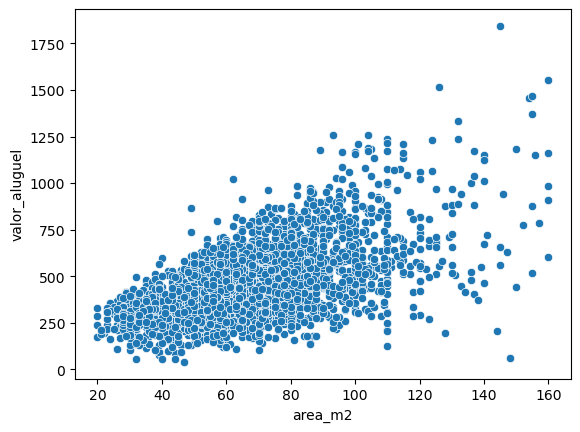

In [20]:
# analisar a relação entre a variável de entrada 'area_m2' e a variável alvo 'valor_aluguel'
sns.scatterplot(data=df_dsa, x='area_m2',y='valor_aluguel')

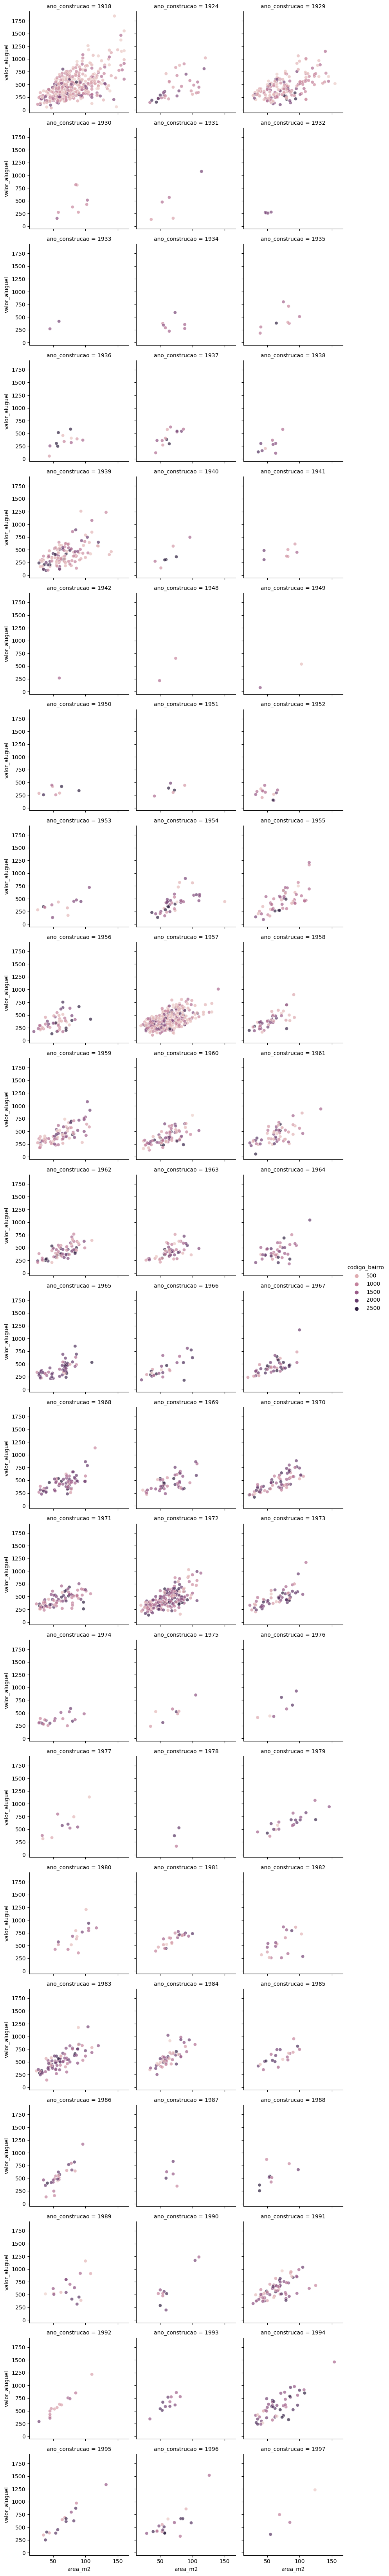

In [21]:
# analisando outras variáveis...
sns.relplot(data=df_dsa, x='area_m2', y='valor_aluguel',
            col='ano_construcao', hue='codigo_bairro', kind='scatter',
            col_wrap=3, height=3, alpha=0.7)


<Axes: >

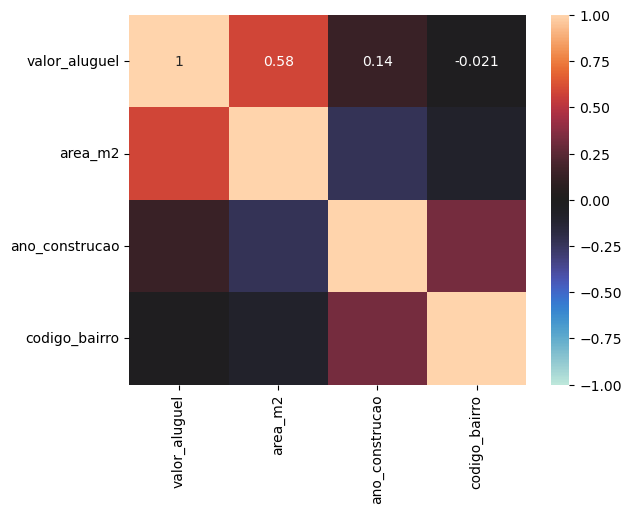

In [24]:
num = df_dsa[['valor_aluguel','area_m2','ano_construcao','codigo_bairro']]
sns.heatmap(num.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, center=0)

[None, None]

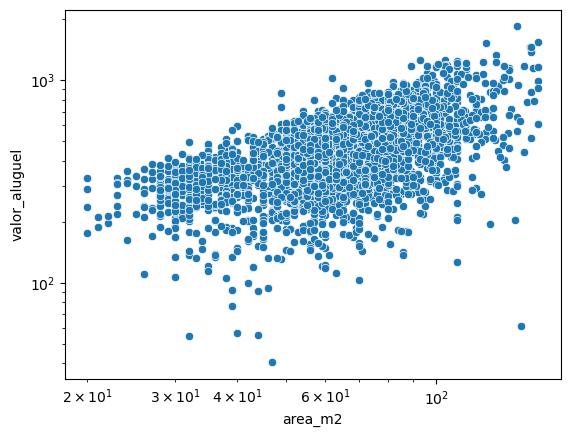

In [25]:
ax = sns.scatterplot(data=df_dsa, x='area_m2',y='valor_aluguel'); ax.set(xscale='log', yscale='log')


In [32]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = df_dsa[['valor_aluguel','area_m2','ano_construcao','codigo_bairro']].copy()

# 1) Design matrix X (somente preditores)
# Trate bairro como categórico (dummies); remova uma categoria de referência
X = pd.get_dummies(df[['area_m2','ano_construcao','codigo_bairro']],columns=['codigo_bairro'], drop_first=True)

# (Opcional) transformar ano em "idade do imóvel", às vezes interpreta melhor:
ref_year = pd.Timestamp.today().year
X['idade_imovel'] = ref_year - df_dsa['ano_construcao']  # se tiver datas
# e então usar 'idade_imovel' no lugar de 'ano_construcao'

# 2) VIF (precisa da constante para cálculo consistente)
X_const = sm.add_constant(X)

vif = pd.DataFrame({
    'variavel': X_const.columns,
    'VIF': [variance_inflation_factor(X_const.values, i)
            for i in range(X_const.shape[1])]
}).sort_values('VIF', ascending=False)

print(vif)

# 3) Número de condição (diagnóstico global de colinearidade)
# (remova a constante para o cálculo)
U, s, Vt = np.linalg.svd(X, full_matrices=False)
cond_number = s.max() / s.min()
print("Numero de condição (κ):", cond_number)


c:\Users\massa\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\massa\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


               variavel       VIF
338        idade_imovel       inf
2        ano_construcao       inf
79    codigo_bairro_623  6.004610
46    codigo_bairro_411  5.900269
37    codigo_bairro_350  5.804065
..                  ...       ...
131  codigo_bairro_1026  1.099758
321  codigo_bairro_2422  1.099651
335  codigo_bairro_2527  1.099651
314  codigo_bairro_2323  1.099642
0                 const  0.000000

[339 rows x 2 columns]
Numero de condição (κ): 624032.976759946


In [33]:
# novo código

# --- 1) Preparar idade e design matrix (SEM ano_construcao) ---
REF_YEAR = 2025
df = df_dsa[['valor_aluguel','area_m2','ano_construcao','codigo_bairro']].copy()
df['idade_imovel'] = REF_YEAR - df['ano_construcao']

# opcional: tratar anos implausíveis
df.loc[(df['ano_construcao'] < 1900) | (df['ano_construcao'] > REF_YEAR), 'idade_imovel'] = np.nan

# design: só preditores
X = pd.get_dummies(
    df[['area_m2','idade_imovel','codigo_bairro']],
    columns=['codigo_bairro'], drop_first=True
).astype(float)

# --- 2) VIF (sem exibir a constante) ---
Xc = sm.add_constant(X, has_constant='add')
vif = pd.DataFrame({
    'variavel': Xc.columns,
    'VIF': [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
})
vif = vif.loc[vif['variavel']!='const'].sort_values('VIF', ascending=False)
print(vif.head(20))

# --- 3) Número de condição (padronizado para reduzir efeito de escala) ---
Xs = X.copy()
Xs = (Xs - Xs.mean())/Xs.std(ddof=0)  # padroniza todas as colunas (inclui dummies)
U, s, Vt = np.linalg.svd(Xs.fillna(0), full_matrices=False)
cond_number = s.max() / s.min()
print("Numero de condição (κ, padronizado):", cond_number)


               variavel       VIF
79    codigo_bairro_623  6.004610
46    codigo_bairro_411  5.900269
37    codigo_bairro_350  5.804065
72    codigo_bairro_563  5.612981
81    codigo_bairro_711  4.941361
38    codigo_bairro_360  4.646706
40    codigo_bairro_372  4.644096
125  codigo_bairro_1013  4.555279
83    codigo_bairro_713  4.256907
48    codigo_bairro_413  4.155897
225  codigo_bairro_1712  3.965939
141  codigo_bairro_1132  3.962594
96    codigo_bairro_816  3.784110
276  codigo_bairro_2024  3.682208
101   codigo_bairro_914  3.681390
63    codigo_bairro_531  3.675628
152  codigo_bairro_1243  3.674750
232  codigo_bairro_1812  3.672482
52    codigo_bairro_422  3.669242
305  codigo_bairro_2221  3.577524
Numero de condição (κ, padronizado): 22.85103880023709


In [34]:
df_dsa.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [35]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_bairro,idade_imovel
0,120.97436,35,1939,1112,86.0
1,436.97433,104,1939,1112,86.0
2,355.74360,29,1971,2114,54.0
3,282.92310,39,1972,2148,53.0
4,807.23080,97,1985,2222,40.0


In [ ]:
# ✅ Criando novo DataFrame com idade_imovel, sem alterar o original

REF_YEAR = 2025  # ou use pd.Timestamp.today().year para ano dinâmico

# Cria uma cópia do df_dsa
df = df_dsa[['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_bairro']].copy()

# Cria a nova coluna idade_imovel no novo df
df['idade_imovel'] = REF_YEAR - df['ano_construcao']

# Higienização básica (opcional)
df.loc[(df['ano_construcao'] < 1900) | (df['ano_construcao'] > REF_YEAR), 'idade_imovel'] = np.nan
df['idade_imovel'] = df['idade_imovel'].clip(lower=0).astype('Int64')

In [ ]:
# ✅ 1. Preparação dos dados

# df já contém as colunas desejadas: valor_aluguel, area_m2, idade_imovel, codigo_bairro

# 1.1) Criação das dummies para 'codigo_bairro'
X = pd.get_dummies(
    df[['area_m2', 'idade_imovel', 'codigo_bairro']],
    columns=['codigo_bairro'],
    drop_first=True  # evita a dummy trap
)

# 1.2) Criação da variável dependente (alvo)
y = df['valor_aluguel']

# 1.3) Adição da constante (intercepto)
X_const = sm.add_constant(X)

In [47]:
# ✅ Correção direta

# Converte para float (impede erro do statsmodels)
X_const = X_const.astype(float)

# Estima o modelo
modelo = sm.OLS(y, X_const).fit()

# Exibe o resumo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     8.981
Date:                Thu, 14 Aug 2025   Prob (F-statistic):          4.04e-259
Time:                        20:17:15   Log-Likelihood:                -18949.
No. Observations:                3000   AIC:                         3.857e+04
Df Residuals:                    2662   BIC:                         4.061e+04
Df Model:                         337                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                384.3331     46

In [ ]:
#✅ 3. Interpretação dos coeficientes

bairros = pd.get_dummies(df['codigo_bairro'], drop_first=True).columns
print("Bairro base (referência):", set(df['codigo_bairro']) - set(bairros.astype(int)))


Bairro base (referência): {113}


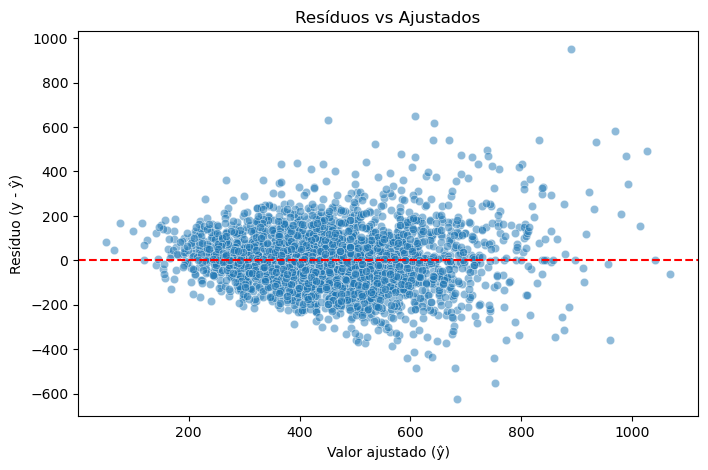

In [46]:
# ✅ 4. Diagnóstico gráfico: resíduos

residuos = modelo.resid
ajustado = modelo.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=ajustado, y=residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valor ajustado (ŷ)")
plt.ylabel("Resíduo (y - ŷ)")
plt.title("Resíduos vs Ajustados")
plt.show()


### Regressao Linear Simples
A Regressão Linear é uma técnica estatística utilizada para modelar a relação entre uma variável dependente (também chamada de variável resposta ou
variável alvo) e uma ou mais variáveis independentes (também chamadas de variáveis explicativas ou preditoras).

A Regressão Linear tem como objetivo estimar os coeficientes da equação que melhor descreve essa relação, minimizando a soma dos erros quadráticos
entre os valores observados e os valores previstos pelo modelo.

Existem dois tipos principais de regressao linear:

Regressão Linear Simples: Neste caso, há apenas uma variável independente envolvida. A equação da Regressão Linear Simples é expressa como:

Y=a+bX+ε

Onde Y é a variável dependente, X é a variável independente, a é o coeficiente linear (intercepto), b é o coeficiente angular (inclinação) e ε é o erro aleatório.

Regressão Linear Múltipla: Neste caso, há duas ou mais variáveis independentes envolvidas. A equação é expressa como:

Y=a+b1X1+b2X2+ ... + bnXn + ε

Onde Y é a variável dependente, X1, X2, ... , Xn são as variáveis independentes, a é o coeficiente linear (intercepto), b1, b2, ... , bn são os coeficientes
angulares (inclinações) e e é o erro aleatório.

A Regressão Linear é amplamente utilizada em diversas áreas, como economia, ciências sociais, biologia e engenharia, para prever resultados, avaliar
relações causais e identificar fatores que contribuem para um fenômeno específico.

#### Construção do Modelo OLS(Ordinary Least Squares) com Statsmodels em Python

In [48]:
df_dsa.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [ ]:
# definimos as variaveis
y=df_dsa['valor_aluguel'] # dependente
x=df_dsa['area_m2'] # independente (tentando identificar se realmente existe relação entre as variaveis)

In [52]:
# Statsmodels requer a adição de uma constante à variável independente
x=sm.add_constant(x)
# criando o modelo
modelo=sm.OLS(y,x)
# treinamento do modelo
resultado=modelo.fit()

O método sm.OLS(y, X) é uma função do pacote Statsmodels, biblioteca Python utilizada para análise estatística. A função OLS (Ordinary Least Squares) é usada para ajustar um modelo de regressão linear, minimizando a soma dos erros quadráticos entre os valores observados e os valores previstos pelo modelo.

A função sm.OLS(y, X) recebe dois argumentos principais:

y: Um array ou pandas Series representando a variável dependente (variável resposta ou alvo). É a variável que você deseja prever ou explicar com base nas variáveis independentes.

X: Um array ou pandas DataFrame representando as variáveis independentes (variáveis explicativas ou preditoras). São as variáveis que você deseja usar para explicar ou prever a variável dependente.

https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

#### Atenção...
Qual a diferença da Análise Estatística e Machine Learning?
R: Depende do objetivo!

Se quero estudar a RELAÇÃO ESTATÍSTICA entre variáveis, então vou fazer Análise Estatítica...

Se quero criar um modelo que ao receber novos dados seja capaz de fazer previsões (MODELO PREDITIVO), então vou fazer um modelo de Machine Learning...

DEEP LEARNING é difícil de fazer estatística por conta da "caixa preta" da decisão, assim utilizamos DL para fazer Machine Learning.

In [54]:
# Resultado do modelo treinado
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Thu, 14 Aug 2025   Prob (F-statistic):          6.84e-275
Time:                        20:42:48   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

#### Interpretando o Resultado do Modelo Estatístico com Statsmodels
A tabela acima traz um resumo do modelo com diversas estatisticas. Aqui faremos a análise de uma delas, o R2.

O coeficiente de determinação, também conhecido como R2, é uma medida estatística que avalia o quão bem o modelo de regressão se ajusta aos dados observados. Ele varia de 0 a 1 e representa a proporção da variação total da variável dependente que é explicada pelo modelo de regressão.

A interpretação do R2 é a seguinte:

R2 = 0: Neste caso, o modelo de regressão não explica nenhuma variação na variável dependente. Isso significa que o modelo não é útil para prever ou explicar a variável de interesse.

R2 = 1: Neste caso, o modelo de regressão explica toda a variação na variável dependente. Isso indica que o modelo se ajusta perfeitamente aos dados e é extremamente útil para prever ou explicar a variável de interesse.

0 < R2 < 1: Neste caso, o modelo de regressão explica uma parte da variação na variável dependente. Quanto maior o valor de R2, melhor o modelo se ajusta aos dados e melhor é a sua capacidade de prever ou explicar a variável de interesse.

É importante notar que um R2 alto não garante que o modelo seja adequado, nem que haja uma relação causal entre as variáveis. Um R2 alto pode ser resultado de variáveis irrelevantes, multicolinearidade ou até mesmo de um ajuste excessivo (overfitting). Portanto, é essencial avaliar outras estatisticas e diagnosticar o modelo antes di tirar conclusões definitivas.

Para estudar Análise Estatística em detalhes recomendamos a Formação Análise Estatística. O tema também é abordado em diversos cursos da Formação Cientista de Dados.

P>|t| --> ajuda a identificar o nível de significância da variável, se P<0.05 significa que a significância estatística da variável (area_m2) é relevante para explicar a contante (valor_aluguel).
R-squared ou R2 (explicado acima) --> quanto mais próximo de 1, mais fácil explicar a variável alvo (valor-aluguel)... portanto, este modelo NÃO explica totalmente o comportamento da variável ALVO por ser 0.342, bem longe de 1, que seria correlação TOTAL.

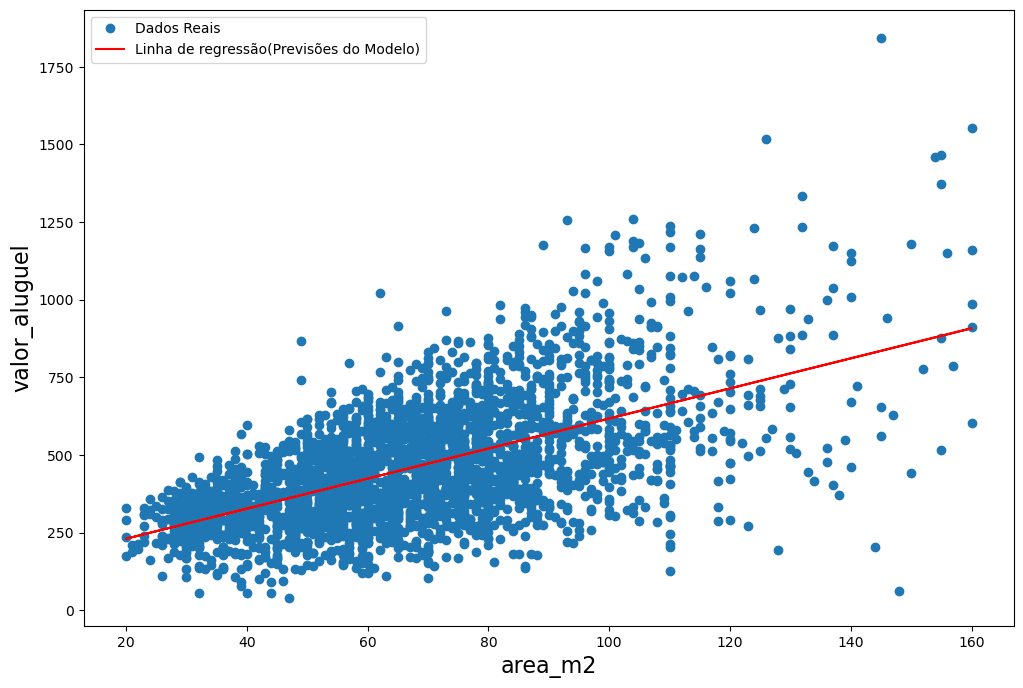

In [55]:
# PLOT
plt.figure(figsize=(12,8))
plt.xlabel('area_m2', size=16)
plt.ylabel('valor_aluguel', size=16)
plt.plot(x['area_m2'], y,'o', label='Dados Reais')
plt.plot(x['area_m2'], resultado.fittedvalues, 'r-', label='Linha de regressão(Previsões do Modelo)')
plt.legend(loc='best')
plt.show()

### Conclusao
Claramente existe uma forte relação entre a área (em m2) dos imóveis e o valor do aluguel. Entretantolapenas a área dos imóveis não é suficiente para explicar a variação no valor do aluguel, pois nosso modelo obteve um coeficiente de determinação (Fi-)de apenas 0.34.

O ideal seria usar mais variáveis de entrada para construir o modelo e fim de compreender se outros fatores influenciam no valor do aluguel.

É sempre importante deixar claro que correlação não implica causalidade e que não podemos afirmar que o valor do aluguel muda apenas devido à área dos imóveis. Para estudar causalidade devemos aplicar Análise Causal.

Em um Projeto de Regressão devemos validar as suposições (que são várias) antes de usar o modelo para tirar conclusões. Isso é ensinado na prática nos cursos da Data Science Academy.

### Statsmodels
#### https://www.statsmodels.org/stable/index.html